# Introduction to linear regression
See Géron, A. (2017). *Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems.* " O'Reilly Media, Inc.".

Linear regression is a simple way of predicting the values of a variable by computing a weighted sum of the features, as follows:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n
$$

or

$$
\hat{y} = \theta^{T} \cdot \vec{x}
$$

In order to train a model and learn $\theta$, we need a measure of quality of the prediction, such as the Mean Square Error (MSE). The values of $\theta$ that **minimize** MSE is the final prediction model.

$$
MSE(\theta) = \frac{1}{m} \sum\limits_{i = 1}^{m} \left(\theta^T \cdot x^i - y^i \right)^{2}
$$

In [9]:
def mse(theta, x, y):
    s = np.array([np.power(theta.T.dot(p) - y[i], 2) for i, p in enumerate(x)]).sum()
    return s / len(x)

## Example

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.random.rand(100, 1)
y = x + np.random.rand(100, 1)
X = np.array([x.ravel(), y.ravel()]).T

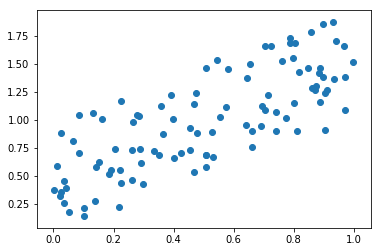

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
X[:10,:]

array([[0.60679208, 1.2135409 ],
       [0.21128239, 0.99521365],
       [0.65770234, 1.65297908],
       [0.81179278, 0.93035866],
       [0.28762288, 1.13711263],
       [0.83656436, 1.77414242],
       [0.79137709, 1.71906826],
       [0.0054825 , 0.34871297],
       [0.1760403 , 0.2699081 ],
       [0.34328165, 1.18846261]])

## Learning $\theta$
There are several solutions for learning $\theta$. One is to calculate the partial derivatives of the cost function for each parameter and then change the parameters in the direction that minimizes the MSE function.

The partial derivative with respect to one of the parameters $\theta_j$ is calculated as:

$$
\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^T \cdot \vec{x}^i -
y^i \right)x_{j}^{i}
$$

which becomes for all the features

$$
\nabla_{\theta} MSE(\theta) = \left(
\begin{array}{c}
\frac{\partial}{\partial \theta_0}MSE(\theta)\\
\frac{\partial}{\partial \theta_1}MSE(\theta)\\
\dots\\
\frac{\partial}{\partial \theta_n}MSE(\theta)\\
\end{array}
\right) = \frac{2}{m} X^T \cdot \left( X \cdot \theta - y \right)
$$

Then, given the gradient vector, we change $\theta$ in the opposite direction by a given factor $\eta$ (called learning rate).

$$
\theta_{\textrm i+1 step} = \theta - \eta \nabla_{\theta} MSE(\theta)
$$

## Example
We need to add x0 = 1 to each point

In [19]:
eta, iterations, size = 0.05, 100, 100
theta = np.random.randn(2, 1)
x_b = np.c_[np.ones((100, 1)), x]

In [20]:
mse(theta, x_b, y)

0.7884749583893328

In [21]:
theta

array([[-0.00703489],
       [ 0.363138  ]])

In [22]:
mse_values = []
for i in range(iterations):
    gradients = 2/size * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    mse_values.append(mse(theta, x_b, y))

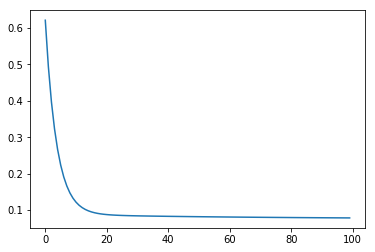

In [23]:
plt.plot(mse_values)
plt.show()

In [24]:
theta

array([[0.53523561],
       [0.91513423]])

### Prediction
We need to add x0 = 1 to each point

In [25]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [26]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [27]:
y_pred = X_new_b.dot(theta)

In [28]:
y_pred

array([[0.53523561],
       [2.36550408]])

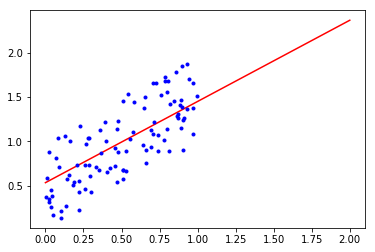

In [29]:
plt.plot(X_new, y_pred, "r-")
plt.plot(x, y, "b.")
plt.show()

In [ ]:
theta

# Sklearn implementation

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(lr.intercept_, lr.coef_)

[0.43522712] [[1.09839152]]


In [34]:
y_pred = lr.predict(X_new)

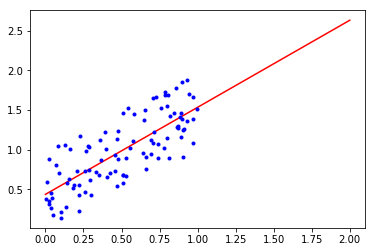

In [35]:
plt.plot(X_new, y_pred, "r-")
plt.plot(x, y, "b.")
plt.show()

# Application to real data

In [36]:
import pandas as pd

In [37]:
d = '/Users/alfio/Dati/kaggle/world-happiness-report/2017.csv'
F = pd.read_csv(d, low_memory=False)

In [38]:
cols = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Freedom'] 
S = F[cols]

In [39]:
S.head()

,Happiness.Score,Economy..GDP.per.Capita.,Freedom
0,7.537,1.616463,0.635423
1,7.522,1.482383,0.626007
2,7.504,1.480633,0.627163
3,7.494,1.564980,0.620071
4,7.469,1.443572,0.617951


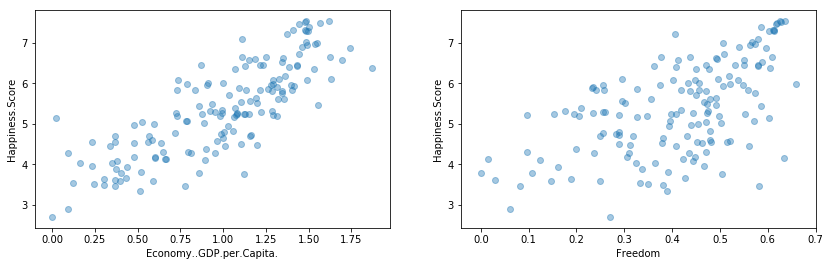

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axes[0].scatter(S.iloc[:,1], S.iloc[:,0], alpha=0.4)
axes[0].set_xlabel(cols[1])
axes[0].set_ylabel(cols[0])
axes[1].scatter(S.iloc[:,2], S.iloc[:,0], alpha=0.4)
axes[1].set_xlabel(cols[2])
axes[1].set_ylabel(cols[0])
plt.show()

In [41]:
def predict(data, features, target):
    lr = LinearRegression()
    if S.iloc[:100,features].shape[1] == 1:
        train_x, train_y = np.array(S.iloc[:100,features]).reshape(-1, 1), S.iloc[:100,target]
        test_x, test_y = np.array(S.iloc[100:,features]).reshape(-1, 1), S.iloc[100:,target]
    else:
        train_x, train_y = np.array(S.iloc[:100,features]), S.iloc[:100,target]
        test_x, test_y = np.array(S.iloc[100:,features]), S.iloc[100:,target]
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    y_pred_t = lr.predict(train_x)
    return y_pred, train_x, train_y, test_x, test_y, y_pred_t

## GDP, Freedom & both

In [42]:
gdp = predict(S, [1], 0)
free = predict(S, [2], 0)
both = predict(S, [1,2], 0)

In [43]:
def visualize(ax, test_x, test_y, pred_y):
    ax.scatter(test_x, test_y, alpha=0.2)
    ax.scatter(test_x, pred_y, alpha=0.4)

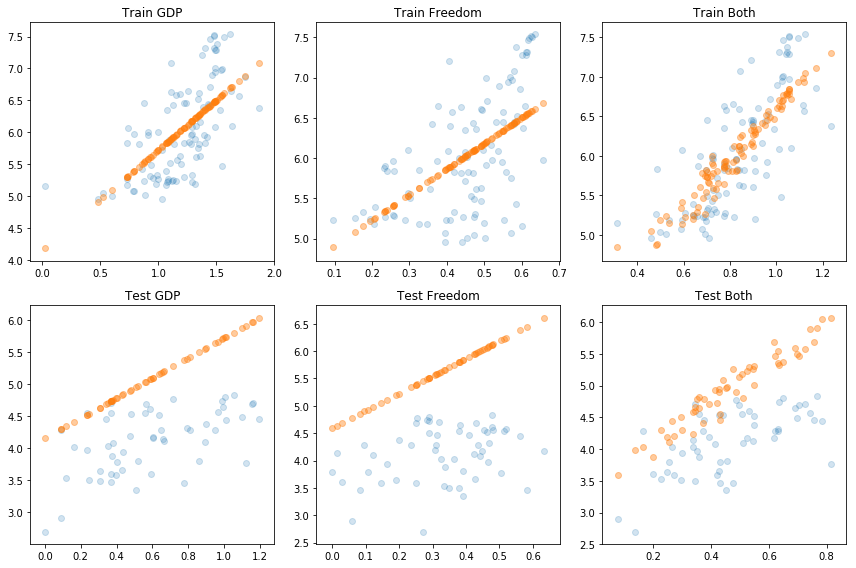

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
visualize(axes[0,0], gdp[1], gdp[2], gdp[5])
axes[0,0].set_title('Train GDP')
visualize(axes[0,1], free[1], free[2], free[5])
axes[0,1].set_title('Train Freedom')
visualize(axes[0,2], both[1].mean(axis=1), both[2], both[5])
axes[0,2].set_title('Train Both')
visualize(axes[1,0], gdp[3], gdp[4], gdp[0])
axes[1,0].set_title('Test GDP')
visualize(axes[1,1], free[3], free[4], free[0])
axes[1,1].set_title('Test Freedom')
visualize(axes[1,2], both[3].mean(axis=1), both[4], both[0])
axes[1,2].set_title('Test Both')
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
print(mean_squared_error(gdp[4], gdp[0]))
print(mean_squared_error(free[4], free[0]))
print(mean_squared_error(both[4], both[0]))

1.1658625351283667
2.639497715674737
0.8895375784159804
